# [9660] Support Vector Machine 3
Data file:
* sklearn : digits

In [1]:
from datetime import datetime
print(f'Run time: {datetime.now().strftime("%D %T")}')

Run time: 11/03/24 14:21:21


### Import libraries

In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn.metrics import accuracy_score

### Set global variables

In [3]:
global example_digit, test_digit

### Load data

(C) 2017-2019 by Damir Cavar - Creative Commons Attribution-ShareAlike 4.0 International License (CA BY-SA 4.0)

From https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html  

Each datapoint is a 8x8 image of a digit
* Classes: 10 (digits 0 to 9)
* Samples per class: ~180
* Samples total: 1797
* Dimensionality: 64
* Features: integers 0-16

In [4]:
digits = datasets.load_digits()

In [5]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

### Examine data

In [6]:
# Each array represents the hexadecimal bitmap of a digit's image
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [7]:
digits.feature_names

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

In [8]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [9]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [10]:
# Print the hexadecimal bitmap of an example digit's image
example_digit = 50     # 50 is the array index (i.e. the 51st element in the array)
digits.data[example_digit]

array([ 0.,  0.,  0.,  5., 14., 12.,  2.,  0.,  0.,  0.,  7., 15.,  8.,
       14.,  4.,  0.,  0.,  0.,  6.,  2.,  3., 13.,  1.,  0.,  0.,  0.,
        0.,  1., 13.,  4.,  0.,  0.,  0.,  0.,  1., 11.,  9.,  0.,  0.,
        0.,  0.,  8., 16., 13.,  0.,  0.,  0.,  0.,  0.,  5., 14., 16.,
       11.,  2.,  0.,  0.,  0.,  0.,  0.,  6., 12., 13.,  3.,  0.])

<Figure size 640x480 with 0 Axes>

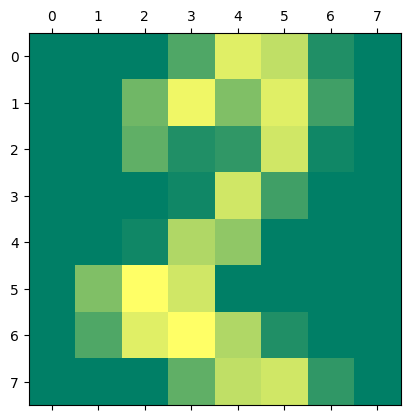

In [11]:
# Print the image of the same example digit
#  matplotlib.pyplot.matshow displays array as a matrix
plt.summer()
plt.matshow(digits.images[example_digit])
plt.show()

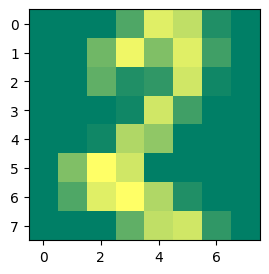

In [12]:
# Print the image of the same example digit using a different function
#  matplotlib.pyplot.imshow displays array as a 2D image
plt.figure(figsize=(3,3))
plt.imshow(digits.images[example_digit], interpolation='nearest')
plt.show()

In [13]:
# Print the target value for the same example digit
print(digits.target[example_digit])

2


### Separate independent and dependent variables

In [14]:
# Implicitly, leave out the last 10 digits for testing
X, y = digits.data[:-10], digits.target[:-10]

### Split data into training and test sets

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    test_size=0.25,
                                                    random_state=42)

### Instantiate SVC model with default hyperparameters

In [16]:
classifier = svm.SVC()

In [17]:
classifier.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

gamma='scale' (default) : uses 1 / (n_features * X.var()) as value of gamma

### Train SVC model with default hyperparameters

In [18]:
%%time

classifier.fit(X_train, y_train)

CPU times: user 62.7 ms, sys: 0 ns, total: 62.7 ms
Wall time: 157 ms


SVC()

In [19]:
# Display calculated gamma value
classifier._gamma

0.0004319505193094656

### Evaluate SVC model with default hyperparameters

In [20]:
classifier_preds = classifier.predict(X_test)
classifier_accuracy = accuracy_score(y_test, classifier_preds)
print(f"SVC model (default hyperparameters) score: {round((classifier_accuracy * 100), 2)}%")

SVC model (default hyperparameters) score: 98.66%


### Instantiate SVC model with gamma='auto'

In [21]:
# gamma='auto' : uses 1 / n_features as the value for gamma
classifier = svm.SVC(gamma='auto')

### Train SVC model with gamma='auto'

In [22]:
%%time

classifier.fit(X_train, y_train)

CPU times: user 308 ms, sys: 5.07 ms, total: 313 ms
Wall time: 733 ms


SVC(gamma='auto')

In [23]:
# Display calculated gamma value
classifier._gamma

0.015625

### Evaluate SVC model with gamma='auto'

In [24]:
classifier_preds = classifier.predict(X_test)
classifier_accuracy = accuracy_score(y_test, classifier_preds)
print(f"SVC model (with gamma='auto') score: {round((classifier_accuracy * 100), 2)}%")

SVC model (with gamma='auto') score: 58.17%


### Instantiate SVC model with a specific gamma

In [25]:
# The hyperparameter gamma controls speed vs accuracy tradeoff
#  The lower the gamma, the slower the training and the higher the accuracy
#  The higher the gamma, the faster the training amd the lower the accuracy
classifier = svm.SVC(gamma=0.0001)

### Train SVC model with a specific gamma

In [26]:
%%time

classifier.fit(X_train, y_train)

CPU times: user 68.6 ms, sys: 394 µs, total: 69 ms
Wall time: 152 ms


SVC(gamma=0.0001)

In [27]:
# Display specified gamma value
classifier._gamma

0.0001

### Evaluate SVC model with a specific gamma

In [28]:
classifier_preds = classifier.predict(X_test)
classifier_accuracy = accuracy_score(y_test, classifier_preds)
print(f"SVC model (with a specific gamma) score: {round((classifier_accuracy * 100), 2)}%")

SVC model (with a specific gamma) score: 97.32%


### Make predictions using trained model

In [29]:
test_digit = -5     # -5 is the fifth element from the end of the test set

In [30]:
# Test classifier on one of the test datapoints that was left out from the training set
print(classifier.predict(digits.data[test_digit].reshape(1,-1)))

[9]


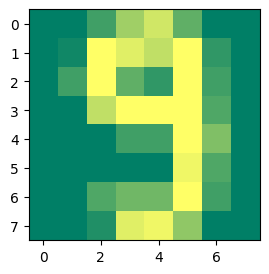

In [31]:
plt.figure(figsize=(3,3))
plt.imshow(digits.images[test_digit], interpolation='nearest')
plt.show()

In [32]:
print(digits.target[test_digit])

9


In [33]:
test_digit = -4     # -4 is the fourth element from the end of the test set

In [34]:
# Test classifier on one of the test datapoints that was left out from the training set
print(classifier.predict(digits.data[test_digit].reshape(1,-1)))

[0]


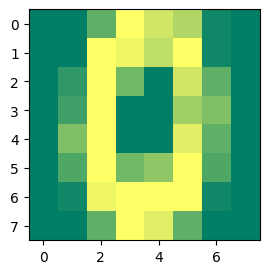

In [35]:
plt.figure(figsize=(3,3))
plt.imshow(digits.images[test_digit], interpolation='nearest')
plt.show()

In [36]:
print(digits.target[test_digit])

0
